In [69]:
import numpy as np
import h5py
import pandas as pd
from glob import glob
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm, Normalize
# settings
plt.style.use("fivethirtyeight")

# Supress runtime warning
import warnings
warnings.filterwarnings("ignore")

out = os.getcwd()+"/out/"

In [70]:
sim_val = pd.read_csv(out + "ejecta_fasttail_vals_at_massmax.csv")
sim_df = pd.read_csv(out + "sim_meta.csv")
df_kenta = pd.merge(sim_df, sim_val, on=["name","label"])
df_kenta

,name,datadir,tmerg,mdot_extract,rhomax,EOS,q,res,given_time,given_date,...,lambda1,lambda2,text,mass,vave,ye_ave,eps_ave,temp_ave,theta_rms,ek
0,SFHoTim276_135_135_45km_150mstg_B0_FUKA,/media/vsevolod/T7/work/KentaData/SFHoTim276_1...,17.2,Mdot_extraction_SFHo_135_135.txt,max_SFHo_135_135.txt,SFHo,1.000000,150,new,12/11/2023,...,NaN,NaN,8.550077,1.081092e-06,0.738014,0.274127,9.899364e+20,3.222824e+08,58.631393,1.054094e+48
1,SFHoTim276_13_14_0025_150mstg_B0_HLLC,/media/vsevolod/T7/work/KentaData/SFHoTim276_1...,15.0,Mdot_extraction_SFHo_13_14.txt,rhomax_SFHo_13_14.txt,SFHo,1.076923,150,new,10/26/2023,...,NaN,NaN,11.018764,2.010213e-06,0.742781,0.305948,9.813487e+20,2.975952e+08,62.059510,1.985798e+48
2,SFHoTim276_12_15_0025_150mstg_B15_HLLD_CT_GS_o...,/media/vsevolod/T7/work/KentaData/SFHoTim276_1...,15.0,Mdot_extraction_SFHo_12_15.txt,max_SFHo_12_15.txt,SFHo,1.250000,150,new,NaN,...,NaN,NaN,0.987471,6.596214e-07,0.745250,0.286977,9.718702e+20,4.247296e+08,67.556995,6.566061e+47
3,BHBLpTim326_135_135_45km_150mstg_B0_HLLC,/media/vsevolod/T7/work/KentaData/BHBLpTim326_...,15.5,Mdot_extraction_BHBLp_135_135.txt,rhomax_BHBLp_135_135.txt,BHBLp,1.000000,150,new,10/11/2023,...,NaN,NaN,-2.001492,8.179031e-08,0.727849,0.326317,9.851060e+20,4.603811e+08,60.464015,7.751820e+46
4,DD2Tim326_135_135_0028_12.5mstg_B15.5_HLLD_CT_GS,/media/vsevolod/T7/work/KentaData/DD2Tim326_13...,8.4,Mdot_extraction_DD2_135_135.txt,max_DD2_135_135.txt,DD2,1.000000,150,new,12/13/2023,...,854.0,854.0,6.433397,4.157059e-07,0.732076,0.271523,9.656495e+20,3.667220e+08,59.225672,3.986188e+47


In [71]:
df_david = pd.read_csv(out + "david_data.csv")
df_david

,name,R1,R2,M1,M2,Mb1,Mb2,Mb,C1,C2,...,k22,Lambda,q,res,EOS,vave,theta_rms,mass,ek,marker
0,0,8.419238,8.419238,1.365,1.365,1.4930,1.4930,2.9860,0.160604,0.160604,...,0.086646,541.701861,1.000000,SR,BLh,0.720000,30.782058,4.234228e-09,3.923813e+45,s
1,1,8.419238,8.419238,1.364,1.364,1.4930,1.4930,2.9860,0.160604,0.160604,...,0.086646,541.701861,1.000000,SR,BLh,0.759306,66.258121,7.887131e-06,8.147085e+48,s
2,2,8.306039,8.477397,1.581,1.184,1.7620,1.2770,3.0390,0.188663,0.138378,...,0.098733,539.150372,1.335304,SR,BLh,NaN,NaN,NaN,NaN,s
3,3,8.307555,8.478078,1.581,1.184,1.7620,1.2770,3.0390,0.188628,0.138367,...,0.098700,539.100000,1.335304,SR,BLh,0.720000,84.489796,4.618034e-09,4.279481e+45,s
4,4,8.263597,8.485081,1.635,1.146,1.8320,1.2320,3.0640,0.196208,0.133774,...,0.101120,540.176880,1.426702,SR,BLh,NaN,NaN,NaN,NaN,s
5,5,8.209664,8.495097,1.699,1.104,1.9150,1.1840,3.0990,0.205245,0.128807,...,0.103353,543.969761,1.538949,SR,BLh,0.720000,11.020408,7.674729e-10,7.112088e+44,s
6,6,8.144277,8.503016,1.772,1.065,2.0100,1.1380,3.1480,0.215686,0.124059,...,0.105447,538.414874,1.663850,SR,BLh,NaN,NaN,NaN,NaN,s
7,7,8.037572,8.511501,1.856,1.020,2.1240,1.0860,3.2100,0.229013,0.118676,...,0.107622,532.954896,1.819608,SR,BLh,0.821424,26.864962,3.717904e-07,4.518169e+47,s
8,8,8.944563,8.944563,1.364,1.364,1.4873,1.4873,2.9746,0.151181,0.151181,...,0.100694,853.830188,1.000000,SR,DD2,0.720000,75.750262,3.741853e-08,3.467535e+46,P
9,9,8.944563,8.944563,1.364,1.364,1.4873,1.4873,2.9746,0.151181,0.151181,...,0.100694,853.830188,1.000000,SR,DD2,NaN,NaN,NaN,NaN,P


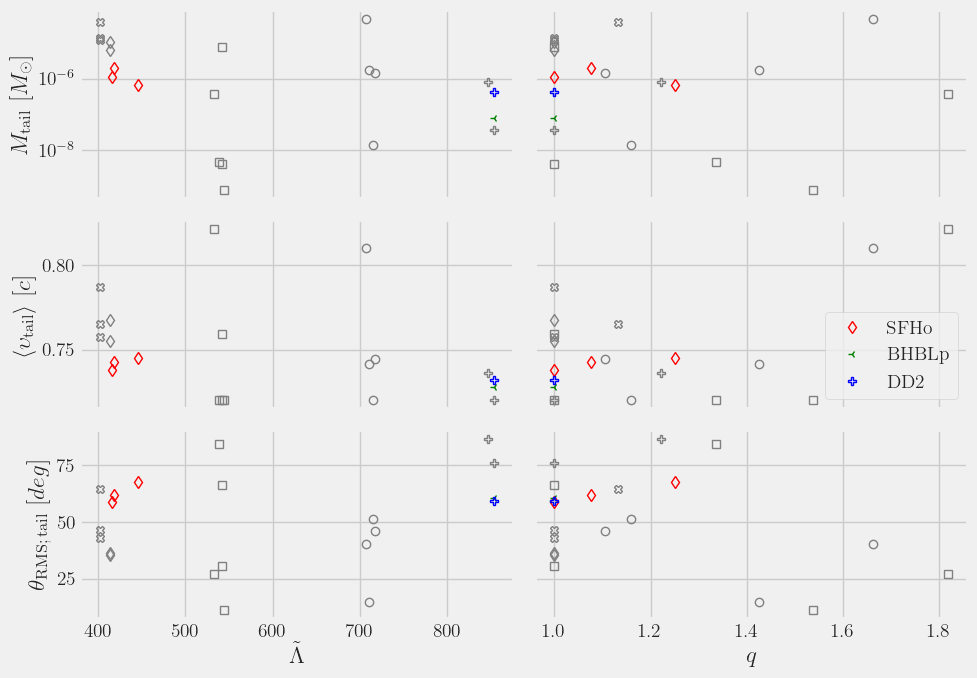

In [77]:
# visaulize

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

fig,axes = plt.subplots(ncols=2,nrows=3,sharex="col",sharey="row",figsize=(10,7))

def plot_markers(ax, df_kenta, df_david, vnx, vny, legend=False):
    
    for x, y, m in zip(df_david[vnx], df_david[vny], df_david["marker"]):
        ax.plot(x, y, marker=m,fillstyle="none",color='gray',ls='none')

    eoss =[]
    for x, y, eos, c in zip(df_kenta[vnx], df_kenta[vny], df_kenta["EOS"], df_kenta["color"]):
        m = df_david["marker"].where(df_david["EOS"] == eos).dropna().unique()
        m = m[0] if len(m)==1 else '3'
        label = eos if eos not in eoss else None
        eoss.append(eos)
        ax.plot(x, y,marker=m,fillstyle="none",color=c,label=label, ls='none')
    
    return ax

for i, vnx in enumerate(["Lambda", "q"]):

    # plt.show()
    ax = axes[0,i]
    ax = plot_markers(ax, df_kenta, df_david, vnx, "mass")
    ax.set_yscale("log")
    if (i == 0): ax.set_ylabel(r"$M_{\rm tail}$ $[M_{\odot}]$")

    ax = axes[1,i]
    ax = plot_markers(ax, df_kenta, df_david, vnx, "vave")
    # ax.set_yscale("log")
    if (i == 0): ax.set_ylabel(r"$\langle \upsilon_{\rm tail} \rangle$ $[c]$")
    if (i == 1): ax.legend()


    ax = axes[2,i]
    ax = plot_markers(ax, df_kenta, df_david, vnx, "theta_rms")
    # ax.set_yscale("log")
    if (i == 0): ax.set_ylabel(r"$\theta_{\rm RMS;\, tail}$ $[deg]$")
    
    if (i==0): ax.set_xlabel(r"$\tilde{\Lambda}$")
    if (i==1): ax.set_xlabel("$q$")
    
    

plt.tight_layout()
plt.show()